In [152]:
import pandas as pd
import numpy as np
import json
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
import os
FOLDER = 'Data_2/'
file_list = sorted(os.listdir(FOLDER))
file_list

['final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz']

In [154]:
import glob
## Make a filepath query
q = FOLDER + "*.csv.gz"
print(q)

Data_2/*.csv.gz


In [155]:
# Use glob.glob to get complete filepaths
file_list = glob.glob(q)
file_list

['Data_2/final_tmdb_data_2006.csv.gz',
 'Data_2/final_tmdb_data_2018.csv.gz',
 'Data_2/final_tmdb_data_2014.csv.gz',
 'Data_2/final_tmdb_data_2008.csv.gz',
 'Data_2/final_tmdb_data_2016.csv.gz',
 'Data_2/final_tmdb_data_2004.csv.gz',
 'Data_2/final_tmdb_data_2020.csv.gz',
 'Data_2/final_tmdb_data_2000.csv.gz',
 'Data_2/final_tmdb_data_2012.csv.gz',
 'Data_2/final_tmdb_data_2010.csv.gz',
 'Data_2/final_tmdb_data_2002.csv.gz',
 'Data_2/final_tmdb_data_2019.csv.gz',
 'Data_2/final_tmdb_data_2007.csv.gz',
 'Data_2/final_tmdb_data_2015.csv.gz',
 'Data_2/final_tmdb_data_2021.csv.gz',
 'Data_2/final_tmdb_data_2017.csv.gz',
 'Data_2/final_tmdb_data_2009.csv.gz',
 'Data_2/final_tmdb_data_2005.csv.gz',
 'Data_2/final_tmdb_data_2001.csv.gz',
 'Data_2/final_tmdb_data_2013.csv.gz',
 'Data_2/final_tmdb_data_2011.csv.gz',
 'Data_2/final_tmdb_data_2003.csv.gz']

In [156]:
# Use glob.glo0b to get complete filepaths and sort
q = FOLDER + "final_*.csv.gz"
print(q)
file_list = sorted(glob.glob(q))
file_list

Data_2/final_*.csv.gz


['Data_2/final_tmdb_data_2000.csv.gz',
 'Data_2/final_tmdb_data_2001.csv.gz',
 'Data_2/final_tmdb_data_2002.csv.gz',
 'Data_2/final_tmdb_data_2003.csv.gz',
 'Data_2/final_tmdb_data_2004.csv.gz',
 'Data_2/final_tmdb_data_2005.csv.gz',
 'Data_2/final_tmdb_data_2006.csv.gz',
 'Data_2/final_tmdb_data_2007.csv.gz',
 'Data_2/final_tmdb_data_2008.csv.gz',
 'Data_2/final_tmdb_data_2009.csv.gz',
 'Data_2/final_tmdb_data_2010.csv.gz',
 'Data_2/final_tmdb_data_2011.csv.gz',
 'Data_2/final_tmdb_data_2012.csv.gz',
 'Data_2/final_tmdb_data_2013.csv.gz',
 'Data_2/final_tmdb_data_2014.csv.gz',
 'Data_2/final_tmdb_data_2015.csv.gz',
 'Data_2/final_tmdb_data_2016.csv.gz',
 'Data_2/final_tmdb_data_2017.csv.gz',
 'Data_2/final_tmdb_data_2018.csv.gz',
 'Data_2/final_tmdb_data_2019.csv.gz',
 'Data_2/final_tmdb_data_2020.csv.gz',
 'Data_2/final_tmdb_data_2021.csv.gz']

In [157]:
## Use list comprehension to load in all files into 1 dataframe
df = pd.concat([pd.read_csv(f, lineterminator = '\n') for f in file_list])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG


In [158]:
# remove ids that are 0 and then reset index
df = df.loc[df['imdb_id']!= '0']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60130 entries, 1 to 3532
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60130 non-null  object 
 1   adult                  60130 non-null  float64
 2   backdrop_path          36994 non-null  object 
 3   belongs_to_collection  3738 non-null   object 
 4   budget                 60130 non-null  float64
 5   genres                 60130 non-null  object 
 6   homepage               14776 non-null  object 
 7   id                     60130 non-null  float64
 8   original_language      60130 non-null  object 
 9   original_title         60130 non-null  object 
 10  overview               58761 non-null  object 
 11  popularity             60130 non-null  float64
 12  poster_path            54382 non-null  object 
 13  production_companies   60130 non-null  object 
 14  production_countries   60130 non-null  object 
 15  rel

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
5,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,46.0,R


In [159]:
# reset index and drop old index
df = df.reset_index(drop = True)

## 1st Hypothesis Test

**Does the MPAA rating of a movie affect how much revenue the movie generates?**

**Null Hypotheses:** 
* The certification of a move does not affect the revenue the movie generates.


**Alternate Hypotheses:** 
* The certification creates a statistical difference in the revenue a movie generates


**Test:** 
* ANOVA (multiple groups, numeric feature)

**Assumptions:**
* Normality
* Equal variance
* No significant outliers


**Features Editing**

In [160]:
df['certification'].value_counts()

R                                  6097
NR                                 3261
PG-13                              3224
PG                                 1432
G                                   442
NC-17                               156
Unrated                               5
-                                     1
UR                                    1
Not Rated                             1
ScreamFest Horror Film Festival       1
R                                     1
PG-13                                 1
10                                    1
Name: certification, dtype: int64

In [161]:
# Features editing for certification column
cert_map = {'G': 'G',
           'NC-17': 'NC-17', 
           'NR': 'NR',
           'PG': 'PG', 
           'PG-13 ': 'PG-13',
           'PG-13': 'PG-13',
           'R ': 'R',
           'R': 'R',
           'Unrated': 'NR',
           'UR': 'NR',
           'Not Rated': 'NR'}

df['certification'] = df['certification'].replace(cert_map)
df['certification'].value_counts()

R                                  6098
NR                                 3268
PG-13                              3225
PG                                 1432
G                                   442
NC-17                               156
-                                     1
ScreamFest Horror Film Festival       1
10                                    1
Name: certification, dtype: int64

In [162]:
# Dropping three columns that don't have proper certification
df.drop(df[df['certification'] == '-'].index, inplace = True)
df.drop(df[df['certification'] == 'ScreamFest Horror Film Festival'].index, inplace = True)
df.drop(df[df['certification'] == '10'].index, inplace = True)
df['certification'].value_counts()

R        6098
NR       3268
PG-13    3225
PG       1432
G         442
NC-17     156
Name: certification, dtype: int64

In [163]:
# Filter movies with revenue
filter_financial = (df['revenue'] >0)
filter_financial.value_counts()

False    52690
True      7437
Name: revenue, dtype: int64

In [164]:
explore_df = df[filter_financial].copy()

In [165]:
explore_df.groupby('certification')['certification'].count()

certification
G         127
NC-17      22
NR        271
PG        630
PG-13    1717
R        2305
Name: certification, dtype: int64

**Visualization**

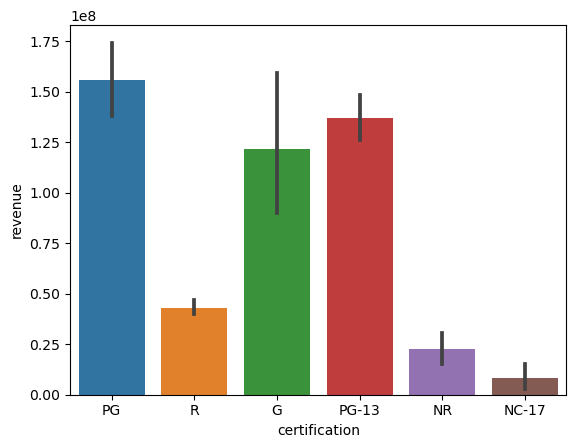

In [166]:
sns.barplot(data = explore_df, x = 'certification', y = 'revenue');

In [167]:
explore_df['certification'].isnull().sum()

2365

In [168]:
explore_df.dropna(subset = ['certification'], inplace=True)

In [169]:
explore_df['certification'].isnull().sum()

0

In [170]:
## Create groups dictionary. 
groups = {}

## Loop through all unique categories
for i in explore_df['certification'].unique():
    ## Get series for group and rename
    data = explore_df.loc[explore_df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'PG-13', 'NR', 'NC-17'])

**Normality**

In [171]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG,630.0,4.886246e-81,369.845936
R,2305.0,0.000000e+00,2081.603857
G,127.0,3.051788e-22,99.082289
PG-13,1717.0,0.000000e+00,1531.897339
NR,271.0,6.586489e-73,332.407383
NC-17,22.0,5.564241e-08,33.408640


In [172]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG,630.0,4.886246e-81,369.845936,True
R,2305.0,0.000000e+00,2081.603857,True
G,127.0,3.051788e-22,99.082289,True
PG-13,1717.0,0.000000e+00,1531.897339,True
NR,271.0,6.586489e-73,332.407383,True
NC-17,22.0,5.564241e-08,33.408640,True


**Results:**

* P values are less than .05 so each group does not have normal distribution but the sample sizes are >20 for each group. 

**Equal Variance**

In [173]:
stats.levene(*groups.values())

LeveneResult(statistic=67.30318802322853, pvalue=2.6836090315468002e-68)

**Results:**

* Fails equal variance with p value less than .05. Will use kruskal wallis test.

**Kruskal Wallis Test**

In [174]:
kruskal_result = stats.kruskal(*groups.values())
kruskal_result

KruskalResult(statistic=752.383392562243, pvalue=2.307970727534749e-160)

**Results:**

* P value is less than .05 so there is a significant difference. 

* Using Tukeys multiple comparison test to see between which groups there is a statistically significant difference.

**Tukeys Comparison Test**

In [175]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = explore_df['revenue']
labels = explore_df['certification']

In [176]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-113347745.4875,0.072,-232258832.811,5563341.8361,False
G,NR,-99001827.0088,0.0,-154374749.7122,-43628904.3054,True
G,PG,33983249.9815,0.3812,-16102965.9551,84069465.9181,False
G,PG-13,15502943.4245,0.938,-31848788.3946,62854675.2436,False
G,R,-78528011.5921,0.0,-125461936.8042,-31594086.3799,True
NC-17,NR,14345918.4787,0.9992,-99805218.4433,128497055.4007,False
NC-17,PG,147330995.469,0.0024,35648631.0656,259013359.8723,True
NC-17,PG-13,128850688.912,0.0115,18367622.3445,239333755.4794,True
NC-17,R,34819733.8954,0.9466,-75484911.6446,145124379.4354,False
NR,PG,132985076.9903,0.0,95578334.2964,170391819.6842,True


**FINAL CONCLUSION:**

* There are 8 significant results where reject = True above. 

* Between G and NR, G & R, NC-17 and PG, NC-17 and PG-13, NR and PG, NR and PG, NR & PG-13, PG & R, PG-13 and R.  

* We can reject the null hypotheses in support of the alternate that there is a statistically significant difference in revenue based on certification/ratings. 

## 2nd Hypothesis Test

**Do movies that are over 2.5 hours long earn more revenue than movies that are less than 2.5 hours?**

**NULL:**

* There is no significant difference in revenue between movies that are more than 2.5 hours long and those that are 1.5 hours long or less. 

**ALTERNATE:**

* There is a statistically significant difference in revenue between movies that are more than 2.5 hours long and those that are 1.5 hours long or less.  

**TEST:**

* 2Ttest

**ASSUMPTIONS:**

* Normality
* Equal Variance
* No outliers

In [177]:
# Filter movies with revenue
filter_financial2 = (df['revenue'] >0)
filter_financial2.value_counts()

False    52690
True      7437
Name: revenue, dtype: int64

In [178]:
run_df = df[filter_financial2].copy()

In [179]:
# column in minutes
run_df['runtime'].value_counts()


90.0     267
100.0    238
97.0     209
105.0    208
95.0     207
        ... 
213.0      1
366.0      1
216.0      1
191.0      1
49.0       1
Name: runtime, Length: 152, dtype: int64

In [180]:
#Checking for missing values, dropping and verifying drop
run_df['runtime'].isna().sum()

3

In [181]:
run_df.dropna(subset = ['runtime'], inplace=True)

In [182]:
run_df['runtime'].isna().sum()

0

**Separating groups**

In [183]:
run_df['long_runtime'] = run_df['runtime'] >= 150
run_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,long_runtime
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG,False
9,tt0120263,0.0,/ynXVuylP8upazjz8lrqb1PEMkdR.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,34070.0,sv,Sånger från andra våningen,...,98.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Songs from the Second Floor,0.0,7.2,205.0,NaN,False
10,tt0120467,0.0,NaN,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.5,40.0,R,False
12,tt0120630,0.0,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,...,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.7,3997.0,G,False
15,tt0120753,0.0,/cXXxi0j9sXFt7LbeajuFoKFqWMu.jpg,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,The Million Dollar Hotel,...,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.9,247.0,R,False


In [184]:
# Separate the column of interest based on groups
long_df = run_df.loc[run_df['long_runtime'] ==True, ['revenue', 'long_runtime']]
short_df = run_df.loc[run_df['long_runtime'] == False, ['revenue', 'long_runtime']]
print(f'There are {len(long_df)} movies that were over 2.5 hours long.')
print(f' There are {len(short_df)} movies that were under 2.5 hours.')

There are 309 movies that were over 2.5 hours long.
 There are 7125 movies that were under 2.5 hours.


**Visualize Group Means**

In [185]:
plot_df = pd.concat([long_df, short_df], axis = 0)
plot_df

,revenue,long_runtime
61,15000000.0,True
158,465361176.0,True
240,215294342.0,True
584,4900000.0,True
749,500000.0,True
...,...,...
60086,8756.0,False
60094,6416063.0,False
60106,19002036.0,False
60107,44888959.0,False


**Visualization**

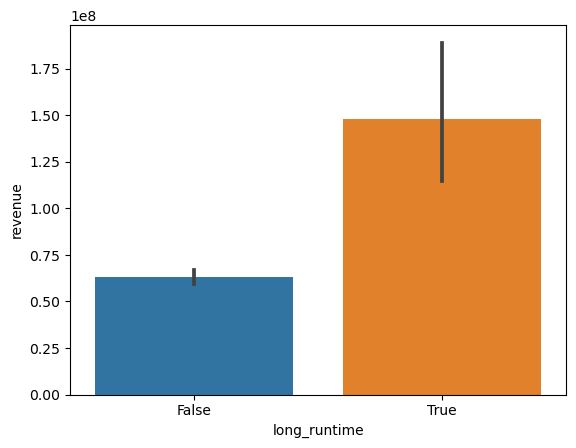

In [186]:
# Visualize means
ax = sns.barplot(data = plot_df, x = 'long_runtime', y = 'revenue');

In [187]:
long_group = long_df['revenue']
short_group = short_df['revenue']
display(long_group.head(), short_group.head())

61      15000000.0
158    465361176.0
240    215294342.0
584      4900000.0
749       500000.0
Name: revenue, dtype: float64

3      12854953.0
9         80334.0
10        14904.0
12    224834564.0
15       105983.0
Name: revenue, dtype: float64

**Assumptions**

**Checking for outliers**

In [188]:
is_outlier_long = np.abs(stats.zscore(long_group)) >3
print(f'There are {is_outlier_long.sum()} outliers in the longrun group out of {len(long_group)}')

There are 3 outliers in the longrun group out of 309


In [189]:
long_df.loc[~is_outlier_long]

,revenue,long_runtime
61,15000000.0,True
158,465361176.0,True
240,215294342.0,True
584,4900000.0,True
749,500000.0,True
...,...,...
59381,74530532.0,True
59422,27000000.0,True
59678,25452983.0,True
59707,39629195.0,True


In [190]:
# removing outliers
long_group = long_group.loc[~is_outlier_long]
long_group

61        15000000.0
158      465361176.0
240      215294342.0
584        4900000.0
749         500000.0
            ...     
59381     74530532.0
59422     27000000.0
59678     25452983.0
59707     39629195.0
59917    402027582.0
Name: revenue, Length: 306, dtype: float64

In [191]:
# Checking short run group for outliers
is_outlier_short = np.abs(stats.zscore(short_group)) >3
print(f"There are {is_outlier_short.sum()} outliers in the shortrun group out of {len(short_group)}.")


There are 170 outliers in the shortrun group out of 7125.


In [192]:
short_group = short_group.loc[~is_outlier_short]
short_group

3         12854953.0
9            80334.0
10           14904.0
12       224834564.0
15          105983.0
            ...     
60086         8756.0
60094      6416063.0
60106     19002036.0
60107     44888959.0
60129      4588389.0
Name: revenue, Length: 6955, dtype: float64

**Normality:**

* There are >20 in each group so we can proceed with the assumption that it is sufficient. 

**Equal Variance**

In [193]:
run_result = stats.levene(long_group, short_group)
print(run_result)
print(run_result.pvalue<.05)

LeveneResult(statistic=208.11752270339676, pvalue=1.5502965698796407e-46)
True


**Result:**

* P value is < .05 so our groups do not have equal variance

* Will use equal_var = False with test to compensate. 

**T-test**

In [194]:
result2 = stats.ttest_ind(long_group, short_group, equal_var = False)
print(result2)
print(result2.pvalue<.05)

Ttest_indResult(statistic=5.613373732415974, pvalue=4.4307015354185354e-08)
True


**FINAL CONCLUSIONS:** 

* Welch's ttest returned a P value less than .05 so we can reject the null hypotheses and support the alternate that there is a significant difference in revenue between movies greater than or equal to 2.5 hours and those less than 2.5 hours. 

* Based on the averages below we can see that movies over 2.5 hours had significantly higher revenue than those under 2.5 hours. 

In [195]:
print(f" The average revenue for the longrun group was {long_group.mean():.2f}")
print(f" The average quantity for the shortrun group was {short_group.mean():.2f}")

 The average revenue for the longrun group was 126366406.14
 The average quantity for the shortrun group was 44991613.48


## 3rd Hypothesis Test

**???**

**NULL:**

**ALTERNATE:**

**TEST:**

**ASSUMPTIONS:**

In [196]:
df['genres'].value_counts()

[{'id': 18, 'name': 'Drama'}]                                                                                                                             10202
[]                                                                                                                                                         6002
[{'id': 35, 'name': 'Comedy'}]                                                                                                                             4061
[{'id': 27, 'name': 'Horror'}]                                                                                                                             2974
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}]                                                                                                1842
                                                                                                                                                          ...  
[{'id': 28, 'name': 'Action'}, {'id': 10

In [197]:
coord = df.loc[0, 'genres']
print(type(coord))
coord

<class 'str'>


"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}, {'id': 10749, 'name': 'Romance'}]"

In [198]:
# Replace single quotes
coord = coord.replace("'",'"')
coord

'[{"id": 35, "name": "Comedy"}, {"id": 10402, "name": "Music"}, {"id": 10749, "name": "Romance"}]'

In [199]:
# Use json.loads
fixed_coord = json.loads(coord)
print(type(fixed_coord))
fixed_coord

<class 'list'>


[{'id': 35, 'name': 'Comedy'},
 {'id': 10402, 'name': 'Music'},
 {'id': 10749, 'name': 'Romance'}]

ValueError: dictionary update sequence element #0 has length 1; 2 is required